Import Data and Ploting Table

In [1]:
# load packages 
import matplotlib.pyplot as plt
from pandas import read_csv, datetime, DataFrame, concat
from sklearn.metrics import mean_squared_error

In [2]:
# parse datetime
def parser(x):
	return datetime.strptime('201'+x, '%Y-%m')

In [3]:
data_path = '../data/pmp/'

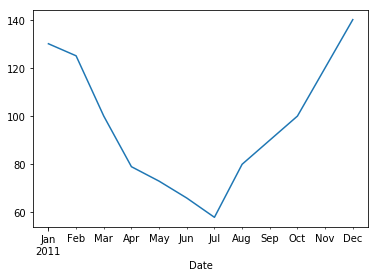

In [4]:
# plot dataset
series = read_csv(data_path+'dataset.csv', header=0, parse_dates=[0], 
                  index_col=0, squeeze=True, date_parser=parser)
series.plot()
plt.show()

Persistence Algorithm

Step 1: Define the Supervised Learning Problem

In [5]:
#create lagged dataset - observation from t-1 to prediction t+1
values = DataFrame(series.values)
dataframe = concat([values.shift(1), values], axis=1)
dataframe.columns = ['t-1', 't+1']
dataframe.head()

,t-1,t+1
0,NaN,130
1,130.0,125
2,125.0,100
3,100.0,79
4,79.0,73


Step 2: Train and Test Sets

In [6]:
# split into train and test sets
X = dataframe.values
train_size = int(len(X) * 0.66)
train, test = X[1:train_size], X[train_size:]
train_X, train_y = train[:,0], train[:,1]
test_X, test_y = test[:,0], test[:,1]

Step 3: Persistence Algorithm

In [7]:
# persistence model
def model_persistence(x):
	return x

Step 4: Make and Evaluate Forecast

In [8]:
# walk-forward validation
predictions = list()
for x in test_X:
	yhat = model_persistence(x)
	predictions.append(yhat)
test_score = mean_squared_error(test_y, predictions)
print('Test MSE: %.3f' % test_score)

Test MSE: 296.800


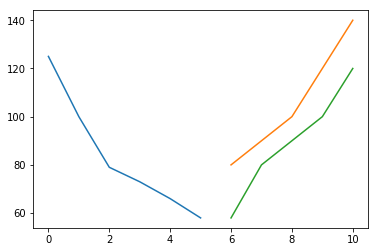

In [9]:
# plot the predictions
plt.plot(train_y)
plt.plot([None for i in train_y] + [x for x in test_y])
plt.plot([None for i in train_y] + [x for x in predictions])
plt.show()